# Genetic Drift

In [1]:
import random
import matplotlib.pyplot as plt

 The random change in population allele frequencies across generations is called **genetic drift**.
 The **Wright-Fisher** model provides a framework for modeling genetic drift under the following assumptions:
 - Generations are discrete and non-overlapping
 - Equal male-to-female ratio
 - Fixed population size across generations
 - No natural selection
## Change in allele frequency in a single generation
 The random sampling of alleles from one generation to the next follows a binomial distribution,
 which is expressed as follows:
 $${{n}\choose{k}} \cdot p^k \cdot (1-p)^{n-k}$$
 For a biallelic locus, the binomial formula gives the probability of sampling $k$ A alleles from a pool of $n$ total
 alleles, given that the frequency of A is $p$
### Example
 At a biallelic locus we have alleles A and B with frequencies $p$ and $q$, respectively,
 and a population size $N$ of 50. Therefore, the total number of alleles in the sampling pool is $2N$

In [2]:
alleles = ["A", "B"]
freq_A = 0.5
freq_B = 1 - freq_A
pop_size = 50

In [3]:
# Create a sequence of A's and B's equal to 2N
start_numA = int(freq_A * 2 * pop_size)
start_numB = (pop_size * 2) - start_numA

# Concatenate A and B strings, convert to list
start_alleles = list((alleles[0] * start_numA) + (alleles[1] * start_numB))

# Draw a random sample of 2N alleles and calculate A and B frequency in the following generation
random.seed(123)
gen2 = random.choices(start_alleles, k=pop_size*2)
freq_A_nextgen = gen2.count("A") / (pop_size * 2)
freq_B_nextgen = 1 - freq_A_nextgen 

print(f"Frequency A: {freq_A_nextgen}")
print(f"Frequency B: {freq_B_nextgen}")

Frequency A: 0.61
Frequency B: 0.39


 After one generation the allele frequencies of A and B have gone from 0.5
 to 0.61 and 0.39, respectively, due to random sampling. Using the same starting parameters,
 what does the distribution of the frequency of A after one generation look like?

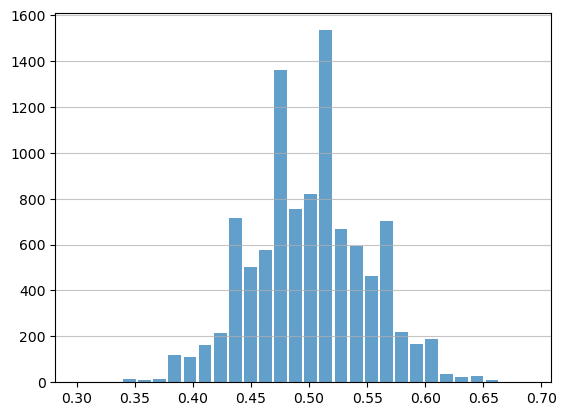

In [4]:
freq_A_rep = []

for i in range(10000):
    gen2 = random.choices(start_alleles, k=pop_size*2)
    freq_A_nextgen = gen2.count("A") / (pop_size*2)

    freq_A_rep.append(freq_A_nextgen)

plt.hist(x=freq_A_rep,bins=30, alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.show()

 The expected value for a random binomial variable is simply $E[X] = p$, and we can see
 that the distribution of the frequency of A after one generation is centered at 0.5. The
 variance of a binomial random variable is $\sigma^2 = pq$. Furthermore, the standard error
 of the mean is: $$SE = \sqrt{\frac{pq}{n}}$$
 In this case $n = 2N$. This means that the variablity in the sampling of alleles over a
 generation is driven by the initial allele frequencies and the size of the sample.
 We can deduce that smaller populations are more likely to experience pronounced changes
 in allele frequencies. To show this, we can write a function to perform the previous operation
 for a series of parameters.

In [5]:
def allele_freq_change_one_gen(freq_A_list, pop_size_list, num_simulations=10000):

    legend_labs = []

    for freq_A in freq_A_list:
        
        p = freq_A
        q = 1 - freq_A
        
        for pop_size in pop_size_list:
            freq_A_rep = []

            for i in range(num_simulations):
                gen2 = random.choices(["A", "B"], weights=[p,q], k=pop_size*2)
                freq_A_nextgen = gen2.count("A") / (pop_size * 2)
                
                freq_A_rep.append(freq_A_nextgen)
            
            plt.hist(freq_A_rep, bins=30, alpha=0.65, rwidth=0.85)
            legend_labs.append(f"Initial Frequency: {freq_A}, Pop Size: {pop_size}")

    plt.xlabel('Frequency of Allele A')
    plt.legend(legend_labs)

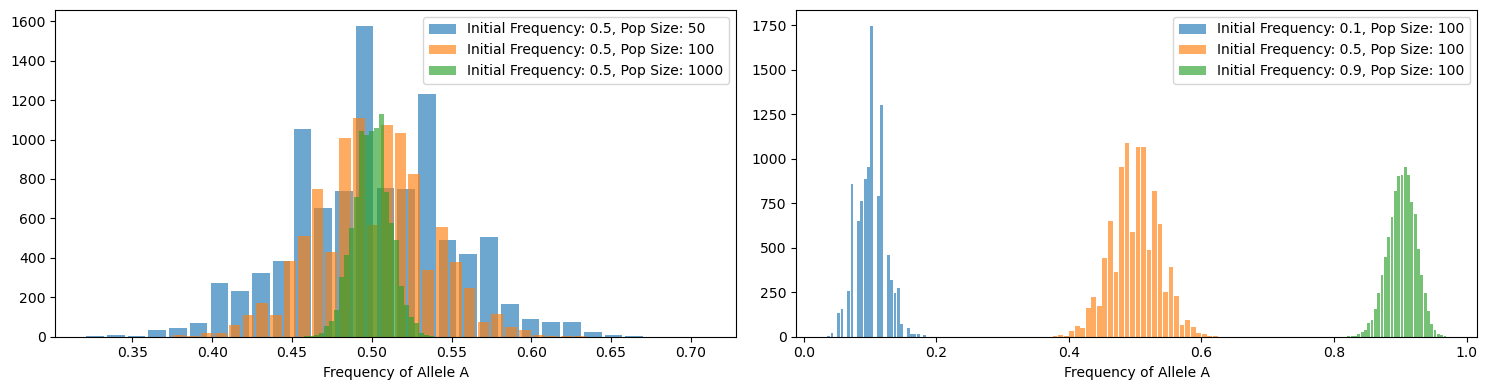

In [6]:
plt.figure(figsize=(15,4))

plt.subplot(1, 2, 1)
allele_freq_change_one_gen(freq_A_list=[0.5], pop_size_list=[50, 100, 1000])

plt.subplot(1, 2, 2)
allele_freq_change_one_gen(freq_A_list=[0.1, 0.5, 0.9], pop_size_list=[100])

plt.tight_layout()
plt.show()

## Change in allele frequency over several generations
 Lets expand the process of drift over many generations. One important adjustment that needs to be made is to
 track changes in allele frequency across generations. The updated allele frequencies
 serve as the sampling probabilities/weights for the following generation.

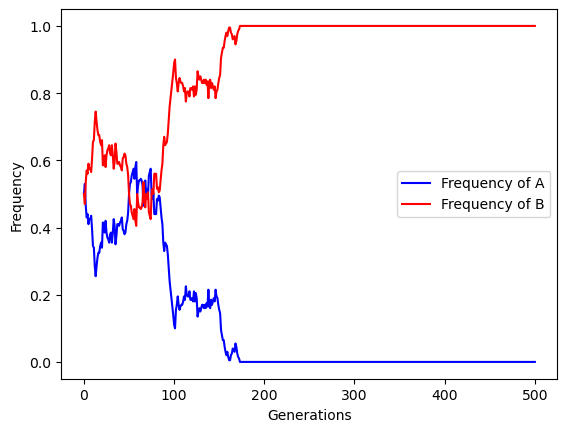

In [7]:
random.seed(1234)

freq_A = []
freq_B = []
pop_size = 100
generations = 500

for gen in range(generations):

    if len(freq_A) == 0:
        freq_A.append(0.5)
        freq_B.append(0.5)

    A_alleles = "A" * int(freq_A[-1] * 2 * pop_size)
    B_alleles = "B" * int(freq_B[-1] * 2 * pop_size)
    allele_pool = list(A_alleles + B_alleles)

    gen_plus1 = random.choices(allele_pool, k=pop_size*2)
    freq_A_gen_plus1 = gen_plus1.count("A") / (pop_size * 2)
    freq_B_gen_plus1 = 1 - freq_A_gen_plus1

    freq_A.append(freq_A_gen_plus1)
    freq_B.append(freq_B_gen_plus1)

generations_list = list(range(generations + 1))

plt.plot(generations_list, freq_A, label="Frequency of A", color = 'b')
plt.plot(generations_list, freq_B, label="Frequency of B", color="red")

plt.xlabel("Generations")
plt.ylabel("Frequency")
plt.legend()

plt.show()

 Setting the population size $N=100$ we see modest changes in allele frequency in the first
 100 generations followed by a sharp divergence. After about 180 generations, the frequencies become
 "fixed" once the frequency of B reaches 1. Once again we'll use a function to observe how population size
 and starting allele frequency affect drift.

In [8]:
def drift_over_time(freq_A=0.5, pop_size=100, generations=100, num_simulations=1):

    generations_list = list(range(generations + 1))

    for sim in range(num_simulations):
    
        p = [freq_A]
        q = [1 - freq_A]

        for gen in range(generations):
            next_gen = random.choices(["A", "B"], weights = [p[-1], q[-1]], k = pop_size*2)
            freq_A_nextgen = next_gen.count("A") / (pop_size * 2)

            p.append(freq_A_nextgen)
            q.append(1 - freq_A_nextgen)
        
        plt.plot(generations_list, p)

    plt.title(f"Genetic Drift Simulation\nPopulation Size: {pop_size}", loc='left')
    plt.xlabel("Generations")
    plt.ylim(0,1)
    plt.ylabel("Frequency of A")

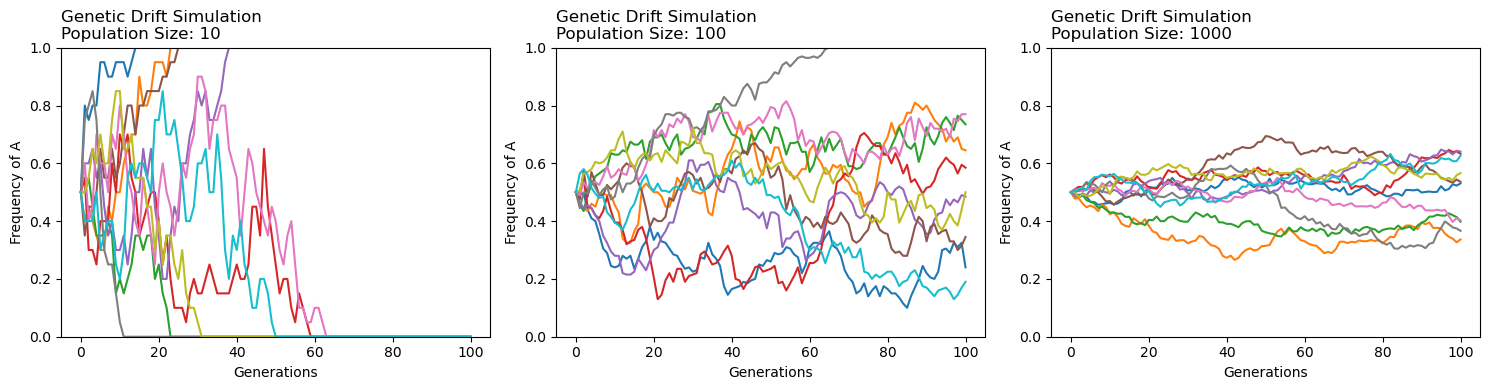

In [9]:
random.seed(123)
plt.figure(figsize=(15, 4)) 

plt.subplot(1, 3, 1)
drift_over_time(pop_size=10, num_simulations=10)

plt.subplot(1, 3, 2)
drift_over_time(pop_size=100, num_simulations=10)

plt.subplot(1, 3, 3)
drift_over_time(pop_size=1000, num_simulations=10)

plt.tight_layout()
plt.show()

 Here we have 10 simulations for populations of 10, 100, and 1000 members in size. The effect of population
 size on allele frequency is clear. For populations with 10 members, increased sampling error causes dramatic fluctuations in
 allele frequency. As a result, all simulations are fixed within 60 generations. Conversely, the allele frequency
 in the 1000-member population has changed only modestly. It's important to note that, under this model framework,
 alleles cannot become unfixed. Consequently, regardless of the initial population size, all simulations will
 eventually reach fixation.

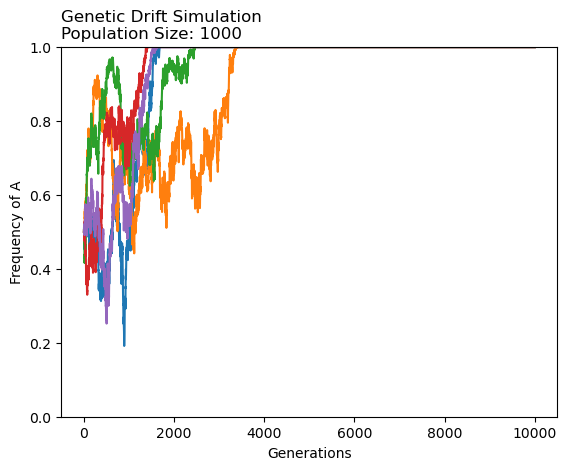

In [10]:
random.seed(123)
drift_over_time(pop_size=1000, num_simulations=5, generations=10000)
plt.show()